**OBJECTIVE:**
To analyse the Domino's pizza outlets on zomato.

**WORKPLAN:**
1. Importing
2. Identify and Remove the duplicate values from res_id
3. Fill the null values where require.
4. Find out the total number of Domino's outlet in different cities.
6. Identify an establishment of it.
7. Outlets in different cities
8. Cuisines offered by Domino's pizza
9. Average cost for two in Different cities
10. Price range in different cities's outlets
11. Aggregate rating of outlets in different cities
12. Corelation between price range and average cost for two 
13. Votes per city
14. Photo count of outlets
15. CONCLUSION


In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
data= pd.read_csv("../input/zomato-restaurants-in-india/zomato_restaurants_in_India.csv")
data.head(10)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
5,3400275,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-civi...,"114/23 G, Deep Shikha Complex, Sanjay Place, C...",Agra,34,Civil Lines,27.201516,78.007556,...,2,Rs.,"['Credit Card', 'Lunch', 'Delivery', 'Dinner',...",4.0,Very Good,707,62,0.0,-1,-1
6,3400296,Honeydew Restaurant,['Quick Bites'],https://www.zomato.com/agra/honeydew-restauran...,"Opposite Soami Bagh Temple, Dayal Bagh, Agra",Agra,34,Dayal Bagh,27.222175,78.010174,...,2,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",4.2,Very Good,647,46,0.0,1,-1
7,3400368,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-sika...,"Plot C-1/6, Sector 13, Sikandra, Agra",Agra,34,Sikandra,27.203930,77.954260,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",3.8,Good,617,18,0.0,-1,-1
8,3401284,Cake House,['Bakery'],https://www.zomato.com/agra/cake-house-2-civil...,"23/301, Wazirpura Rd, Judge Compound Chowraha,...",Agra,34,Civil Lines,27.204148,78.009025,...,2,Rs.,"['Takeaway Available', 'Cash', 'Indoor Seating...",3.4,Average,322,14,0.0,1,-1
9,3400838,Sugar N Thyme,['Café'],https://www.zomato.com/agra/sugar-n-thyme-tajg...,"1374 K/1375 K, Ground floor, Dinesh Nagar, Fat...",Agra,34,Tajganj,27.158243,78.045591,...,3,Rs.,"['No Alcohol Available', 'Dinner', 'Delivery',...",4.4,Very Good,289,324,0.0,1,-1


In [5]:
data.info

<bound method DataFrame.info of           res_id                            name      establishment  \
0        3400299                     Bikanervala    ['Quick Bites']   
1        3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2        3401013                   Bhagat Halwai    ['Quick Bites']   
3        3400290                   Bhagat Halwai    ['Quick Bites']   
4        3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   
...          ...                             ...                ...   
211939   3202251  Kali Mirch Cafe And Restaurant  ['Casual Dining']   
211940   3200996                      Raju Omlet    ['Quick Bites']   
211941  18984164                The Grand Thakar  ['Casual Dining']   
211942   3201138                          Subway    ['Quick Bites']   
211943  18879846     Freshco's - The Health Cafe           ['Café']   

                                                      url  \
0       https://www.zomato.com/agra/bikanervala-khanda

In [6]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [7]:
data.shape

(211944, 26)

In [8]:
data.drop_duplicates(['res_id'], inplace=True)

In [9]:
data.shape

(55568, 26)

In [10]:
data.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

In [11]:
dom = data[data.name == "Domino's Pizza"]

In [12]:
dom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 5 to 210387
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                399 non-null    int64  
 1   name                  399 non-null    object 
 2   establishment         399 non-null    object 
 3   url                   399 non-null    object 
 4   address               399 non-null    object 
 5   city                  399 non-null    object 
 6   city_id               399 non-null    int64  
 7   locality              399 non-null    object 
 8   latitude              399 non-null    float64
 9   longitude             399 non-null    float64
 10  zipcode               74 non-null     object 
 11  country_id            399 non-null    int64  
 12  locality_verbose      399 non-null    object 
 13  cuisines              399 non-null    object 
 14  timings               399 non-null    object 
 15  average_cost_for_two

In [13]:
dom.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
5,3400275,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-civi...,"114/23 G, Deep Shikha Complex, Sanjay Place, C...",Agra,34,Civil Lines,27.201516,78.007556,...,2,Rs.,"['Credit Card', 'Lunch', 'Delivery', 'Dinner',...",4.0,Very Good,707,62,0.0,-1,-1
7,3400368,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-sika...,"Plot C-1/6, Sector 13, Sikandra, Agra",Agra,34,Sikandra,27.203930,77.954260,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",3.8,Good,617,18,0.0,-1,-1
15,3400611,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-kaml...,"Ground & First Floor, City Mall, Balkeshwar Co...",Agra,34,Kamla Nagar,27.212943,78.026549,...,2,Rs.,"['Credit Card', 'Dinner', 'Debit Card', 'Takea...",3.5,Good,490,17,0.0,-1,-1
28,3400251,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-agra...,"113-116, DC Nand Plaza, 50B Taj Road, Agra Can...",Agra,34,Agra Cantt,27.163620,78.014850,...,2,Rs.,"['Lunch', 'Takeaway Available', 'No Alcohol Av...",3.6,Good,433,26,0.0,-1,-1
43,3400208,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-tajg...,"921, Upper Ground Floor, Heritage Villa, Fateh...",Agra,34,Tajganj,27.162100,78.038200,...,2,Rs.,"['Lunch', 'Takeaway Available', 'No Alcohol Av...",3.8,Good,336,38,0.0,-1,-1


In [14]:
dom.shape

(399, 26)

['Bikanervala' 'Mama Chicken Mama Franky House' 'Bhagat Halwai' ...
 'Red China' 'Wah Ustad' 'Geeta lodge']
41100
Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: name, Length: 41100, dtype: int64


<AxesSubplot:title={'center':'Top Outlets on zomato(By numbers of outlets)'}, xlabel='Top Outlets on Zomato', ylabel='number of outlets'>

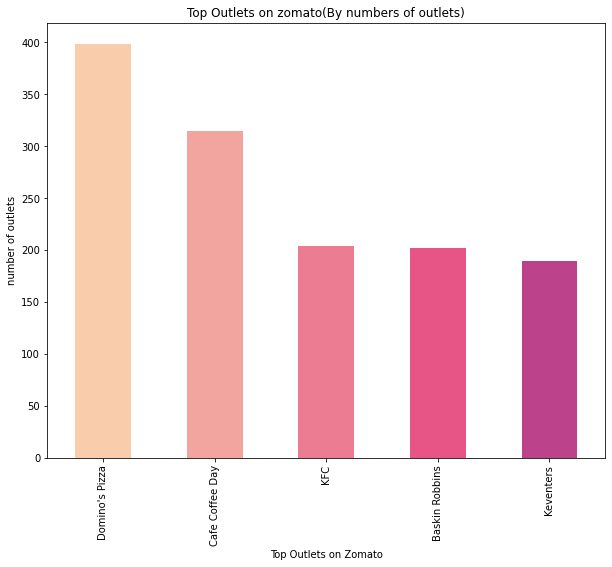

In [15]:
print(data['name'].unique())
print(data['name'].nunique())
print(data['name'].value_counts())
data['name'].value_counts()[:5].plot(kind='bar', color=["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"], xlabel='Top Outlets on Zomato', ylabel='number of outlets',figsize=(10,8), title='Top Outlets on zomato(By numbers of outlets)')

In [17]:
print(data["establishment"].unique())
print(data["establishment"].nunique())
print(data["establishment"].value_counts())

["['Quick Bites']" "['Casual Dining']" "['Bakery']" "['Café']" "['Dhaba']"
 "['Bhojanalya']" "['Bar']" "['Sweet Shop']" "['Fine Dining']"
 "['Food Truck']" "['Dessert Parlour']" "['Lounge']" "['Pub']"
 "['Beverage Shop']" "['Kiosk']" "['Paan Shop']" "['Confectionery']" '[]'
 "['Shack']" "['Club']" "['Food Court']" "['Mess']" "['Butcher Shop']"
 "['Microbrewery']" "['Cocktail Bar']" "['Pop up']" "['Irani Cafe']"]
27
['Quick Bites']        14032
['Casual Dining']      12270
['Café']                4123
['Bakery']              3741
['Dessert Parlour']     3675
['Sweet Shop']          2615
['Beverage Shop']       2440
[]                      1830
['Fine Dining']         1535
['Food Court']          1494
['Bar']                 1399
['Dhaba']               1282
['Kiosk']               1126
['Food Truck']           868
['Lounge']               820
['Bhojanalya']           632
['Mess']                 361
['Pub']                  357
['Paan Shop']            320
['Confectionery']        218
[

In [ ]:
print(data.loc[data['name']=="Domino's Pizza", 'establishment'].value_counts())
data.loc[data['name']=="Domino's Pizza", 'establishment'].value_counts().plot(kind='pie', figsize=(10,8), autopct='%1.1f%%', title='Dominos Pizza (Establishment)')



In [19]:
data.loc[(data['name']=="Domino's Pizza") & (data['establishment']=="['Food Truck']"),'city' ]
data.loc[(data['name']=="Domino's Pizza") & (data['establishment']=="['Food Truck']"),'locality' ]


55561    Sector 127
Name: locality, dtype: object

Approx 91% (that is 364 out of 399) of Domino's outlets has the Quick Bites establishment and the others establishment are casual dining, Food truck and one establishment is unknown. only one outlet has food Truck located in noida, sector 127

<AxesSubplot:ylabel='city'>

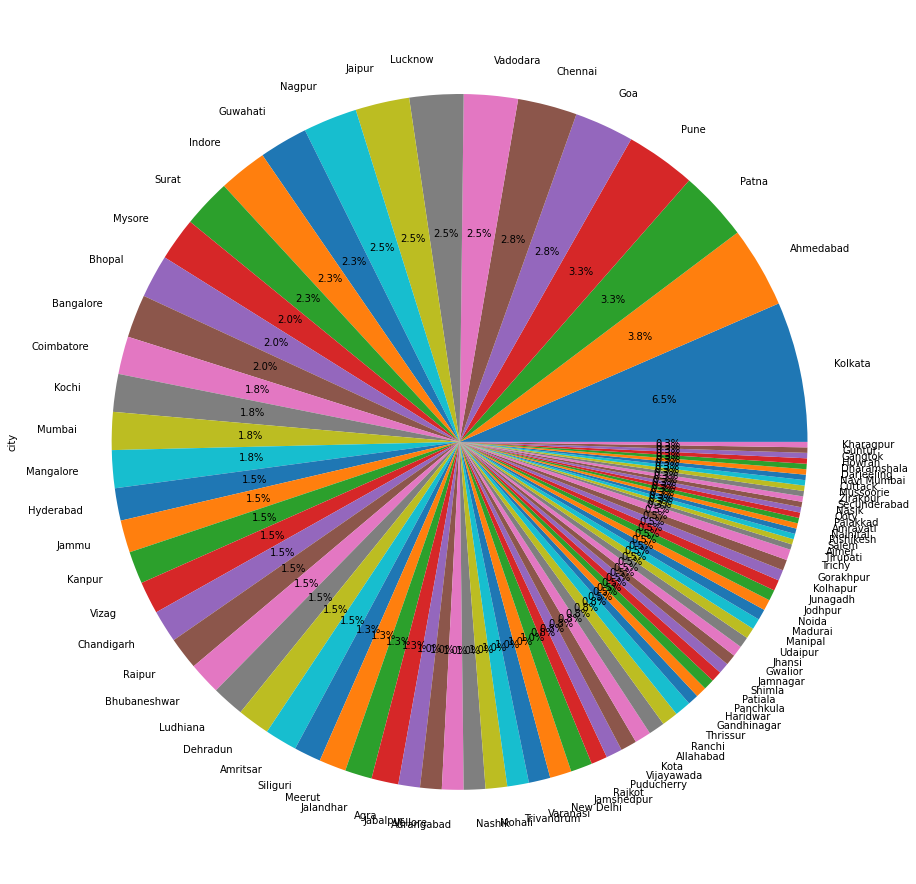

In [20]:
data.loc[data['name']=="Domino's Pizza", 'city'].value_counts()
data.loc[data['name']=="Domino's Pizza", 'city'].value_counts().plot(kind='pie', autopct='%1.1f%%')


<AxesSubplot:title={'center':'Top 4 cities have maximum number of Dominos outlets'}, xlabel='Cities', ylabel="Number of domino's outlets">

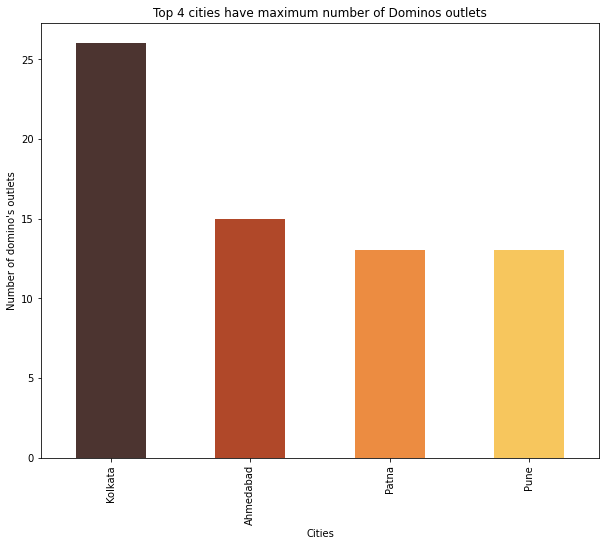

In [21]:
data.loc[data['name']=="Domino's Pizza", 'city'].value_counts()[:4].plot(kind='bar', figsize=(10,8), xlabel='Cities', ylabel="Number of domino's outlets", title='Top 4 cities have maximum number of Dominos outlets', color=['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86'])


In [22]:
print(((data.loc[data['name']=="Domino's Pizza", 'city'].value_counts())==1).value_counts())



False    67
True     20
Name: city, dtype: int64


87 different cities have the Domino's pizza outlets. Kolkata has the maximum number of chains of Dominos i.e., 26. In 20 cities only single outlet of Dominos is present.

In [23]:
print(data['cuisines'].unique())
data['cuisines'].nunique()

['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']


9382

Total 9382 types of cuisines are mention but 470 of cuisines were blank so first need to fix those null values. we can see that each restaurant has a list of cusinies and the composition of the list is the reason why we have so many different cuisine classes.

In [24]:
data['cuisines']=data['cuisines'].fillna("no cuisines")

In [25]:
(data.loc[data['name']=="Domino's Pizza", 'cuisines']).value_counts()

Pizza, Fast Food    399
Name: cuisines, dtype: int64

All Dominos pizza's Outlets has the Pizza and fast food cuisines.

In [26]:
data['average_cost_for_two'].unique()

array([  700,   600,   300,  1000,   400,   500,  1200,  1600,   250,
         200,   150,  1500,   800,   450,   850,   350,   900,  6000,
         650,   550,  2500,  6500,  5500,  4300,  3600,  3500,  3200,
        3000,  2800,  2000,  1800,  1400,  1300,  1250,  1150,  1100,
        1050,    50,    60,   100,   750,     0,   220,   260,   950,
        1900,  2400,  2300,  2200,  1700,  1230,    70,   140,   120,
         470,    20,    40,   110,    80,    90,   440,  2100, 14000,
        5000,  4500,  4100,  4000,  3700,  3400,  2700,  2600,  1650,
        1350,   180,  1260,     2,   197,   312,   170,   240,   330,
        3100,  4200,  1850,  3300,  4800,  3800,  3250,  2900,  1750,
         282,    35,   149,  1550,  5100,  6600,  1450,   160,  2250,
        8000,  7000,  3900,  3650,  1020,   320,   360,   280,   130,
       15000,  2501,    30,  1950,  1875,  1190,   309, 12000,   380,
         299,    45,   190,  4600,   880,    75,   620,   999, 10000,
         505, 30000,

400    389
700     10
Name: average_cost_for_two, dtype: int64
86619     700
86649     700
87697     700
87679     700
86661     700
         ... 
71164     400
70984     400
70595     400
70583     400
210387    400
Name: average_cost_for_two, Length: 399, dtype: int64


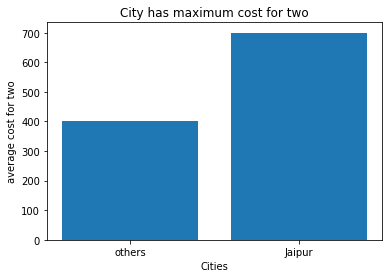

In [27]:
print(data.loc[data['name']=="Domino's Pizza", 'average_cost_for_two'].value_counts())


print(data.loc[data['name']=="Domino's Pizza", 'average_cost_for_two'].sort_values(ascending=False))
data.loc[(data['name']=="Domino's Pizza") & (data['average_cost_for_two']==700),'city' ]
y=np.array([400,700])
x=['others','Jaipur']
plt.bar(x,y)
plt.xlabel('Cities')
plt.ylabel("average cost for two")
plt.title("City has maximum cost for two")
plt.show()


The average costs for two of Dominos are 700 and 400. Mostly chains of Dominos show 400 average cost for two but the outlets in Jaipur shows 700 average cost for two.

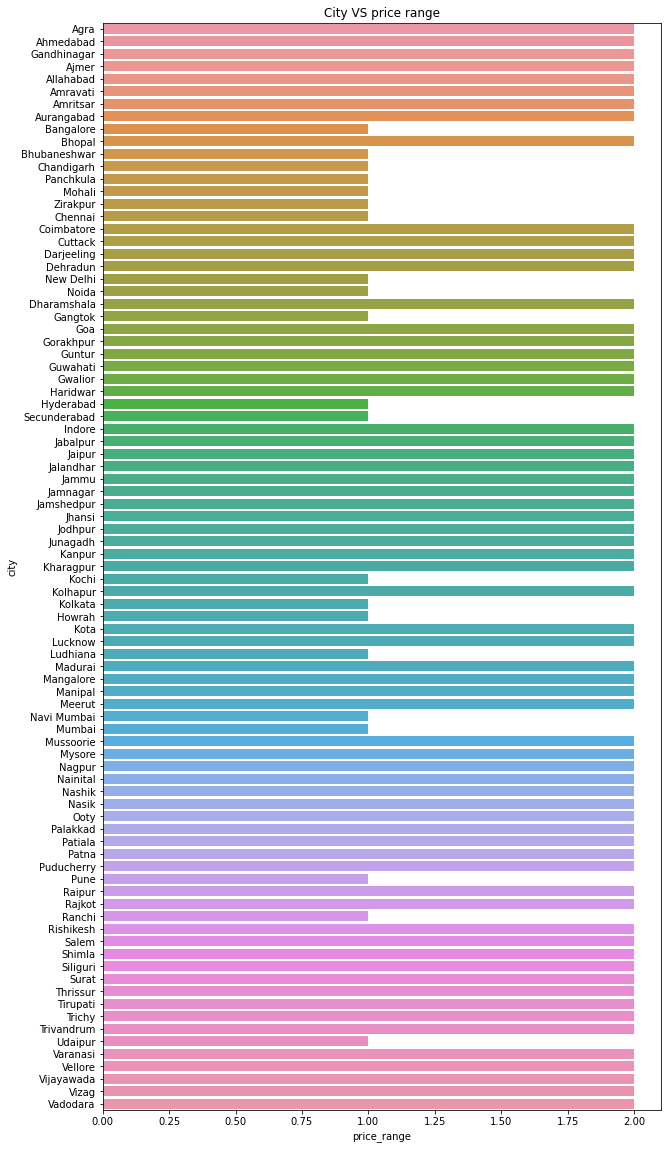

In [28]:
plt.figure(figsize=(10,20))
sns.barplot(x="price_range",y="city",data=dom)
plt.title("City VS price range")
plt.show()

2    281
1    118
Name: price_range, dtype: int64
1.7042606516290726


<AxesSubplot:title={'center':'Number of outlets in different cities having 2 pirice range'}, xlabel='Cities', ylabel='Number of outlets'>

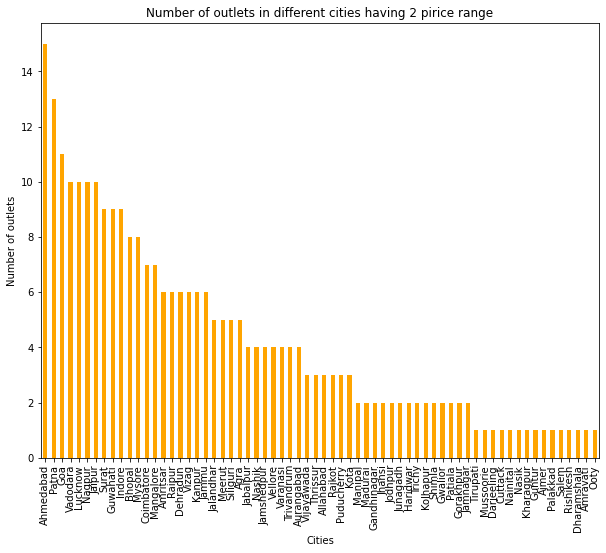

In [29]:
print(data.loc[data['name']=="Domino's Pizza", 'price_range'].value_counts())
print(data.loc[data['name']=="Domino's Pizza", 'price_range'].mean())

data.loc[(data['name']=="Domino's Pizza") & (data['price_range']==2),'city' ].unique()
data.loc[(data['name']=="Domino's Pizza") & (data['price_range']==2),'city' ].value_counts().plot(kind='bar',figsize=(10,8), color='orange', title='Number of outlets in different cities having 2 pirice range', xlabel='Cities', ylabel='Number of outlets')




Ahmedabad has the maximum outlets with price range of 2.

['Bangalore' 'Bhubaneshwar' 'Chandigarh' 'Panchkula' 'Mohali' 'Zirakpur'
 'Chennai' 'New Delhi' 'Noida' 'Gangtok' 'Hyderabad' 'Secunderabad'
 'Kochi' 'Kolkata' 'Howrah' 'Ludhiana' 'Navi Mumbai' 'Mumbai' 'Pune'
 'Ranchi' 'Udaipur']
Kolkata         26
Pune            13
Chennai         11
Bangalore        8
Mumbai           7
Kochi            7
Bhubaneshwar     6
Ludhiana         6
Hyderabad        6
Chandigarh       6
New Delhi        4
Mohali           4
Ranchi           3
Noida            2
Panchkula        2
Udaipur          2
Gangtok          1
Secunderabad     1
Zirakpur         1
Howrah           1
Navi Mumbai      1
Name: city, dtype: int64


<AxesSubplot:title={'center':'Number of outlets in different cities having 1 pirice range'}, xlabel='Cities', ylabel='Number of outlets'>

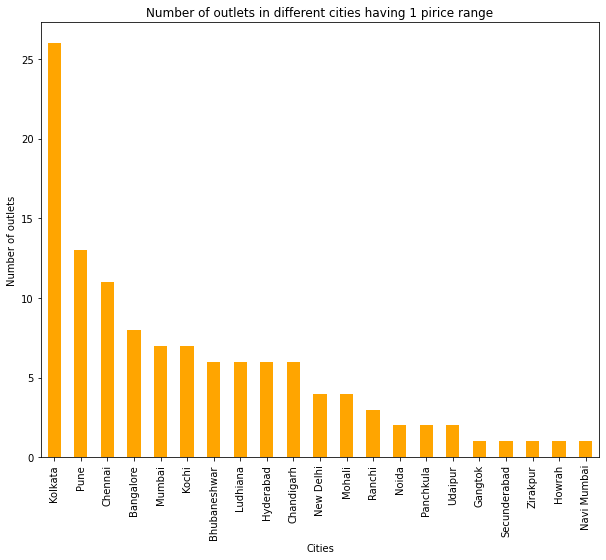

In [30]:
print(data.loc[(data['name']=="Domino's Pizza") & (data['price_range']==1),'city' ].unique())
print(data.loc[(data['name']=="Domino's Pizza") & (data['price_range']==1),'city' ].value_counts())
data.loc[(data['name']=="Domino's Pizza") & (data['price_range']==1),'city' ].value_counts().plot(kind='bar',figsize=(10,8), color='orange', title='Number of outlets in different cities having 1 pirice range', xlabel='Cities', ylabel='Number of outlets')


Mostly outlets of Dominos has 2 price range. 66 cities have the price range of 2 and 21 unique cities have price range of 1.Mostly metro cities like Bangalore, Mumbai, New Delhi, Kolkata have the price range of 1. 

In [31]:
data['currency'].unique()

array(['Rs.'], dtype=object)

because this data is Indian Zomato data, so there are only one currency is shown i.e. Rs

3.6654135338345863
3.9    68
3.8    61
3.7    55
4.0    51
3.6    36
4.1    29
3.5    21
3.4    16
3.3    10
3.2    10
2.7     7
2.8     6
2.9     6
4.2     6
3.1     5
0.0     4
2.5     3
3.0     2
4.3     1
2.6     1
2.4     1
Name: aggregate_rating, dtype: int64


<AxesSubplot:title={'center':'Number of outlets in different cities having less than 3 rating'}, xlabel='Cities', ylabel='Number of outlets'>

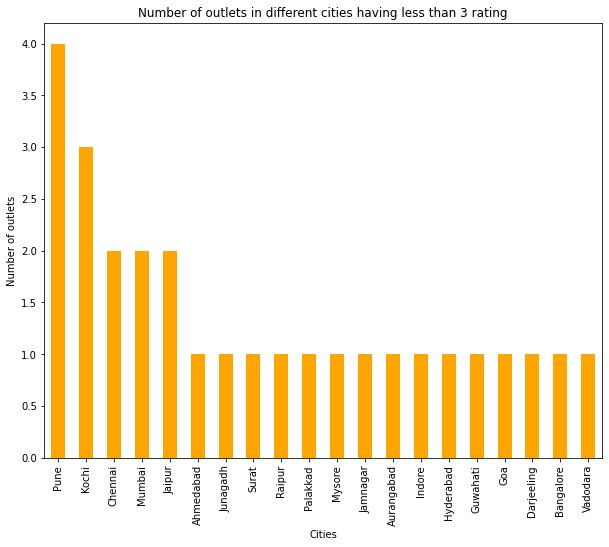

In [32]:
print(data.loc[data['name']=="Domino's Pizza", 'aggregate_rating'].mean())
print(data.loc[data['name']=="Domino's Pizza", 'aggregate_rating'].value_counts())

data.loc[(data['name']=="Domino's Pizza") & (data['aggregate_rating']<3),'city' ].value_counts().plot(kind='bar',figsize=(10,8), color='orange', title='Number of outlets in different cities having less than 3 rating', xlabel='Cities', ylabel='Number of outlets')


<AxesSubplot:title={'center':'Number of outlets in different cities having maximum rating(4.2)'}, xlabel='Cities', ylabel='Number of outlets'>

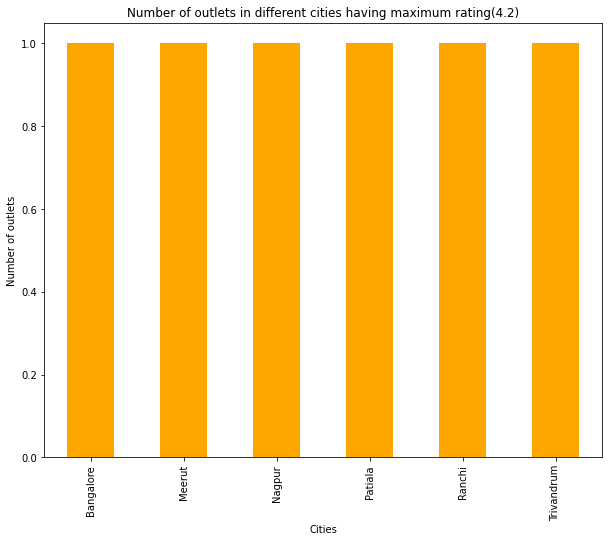

In [33]:
data.loc[(data['name']=="Domino's Pizza") & (data['aggregate_rating']==4.2),'city' ].value_counts().plot(kind='bar',figsize=(10,8), color='orange', title='Number of outlets in different cities having maximum rating(4.2)', xlabel='Cities', ylabel='Number of outlets')


Bangalore, Meerut, nagpur, patiala, ranchi, trivandum's outlets have the maximum rating i.e 4.2. 20 cities's outlets have less tahn 3 rating.

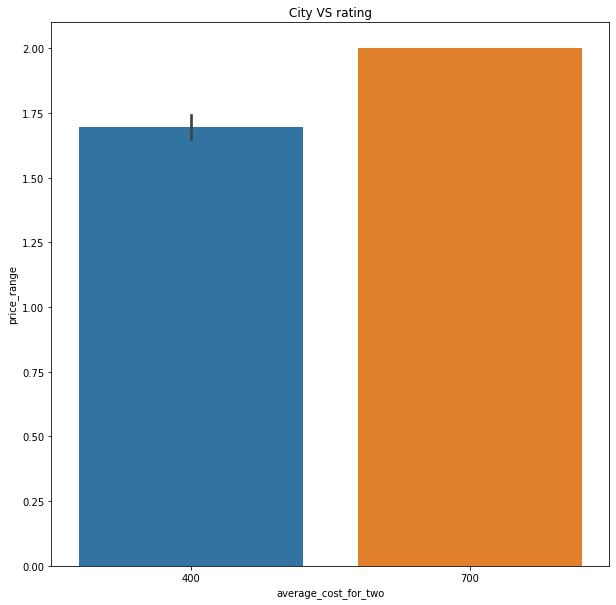

In [34]:
plt.figure(figsize=(10,10))
sns.barplot(x="average_cost_for_two",y="price_range",data=dom)
plt.title("City VS rating")
plt.show()

all the outlets of jaipur has the price range of two

In [ ]:
plt.figure(figsize=(10,20))
sns.barplot(x="aggregate_rating",y="city",data=dom)
plt.title("City VS rating")
plt.show()

The Domino's outlets has the maximum rating of 4.2 which had by 6 chains and only 1 chain which is located in pune has the minimum rating of 2.4. Maximum outlets have the 3.9 rating.
3.6 is the average rating of Dominos given by costumers

In [36]:
print(data.loc[data['name']=="Domino's Pizza", 'rating_text'].value_counts())
(data.loc[data['name']=="Domino's Pizza", 'rating_text'].value_counts()).plot(kind='bar', figsize=(10,8), xlabel='Number of Dominos Outlets' , ylabel='Rating', title='Dominos Outlet rating', color=['#fded86', '#fce36b', '#f7c65d', '#f1a84f', '#ec8c41', '#e76f34', '#e25328'])


Good         241
Very Good     87
Average       66
Not rated      4
Poor           1
Name: rating_text, dtype: int64


In [37]:
data.loc[(data['name']=="Domino's Pizza") & (data['rating_text']=='Poor'),'city' ]

164780    Pune
Name: city, dtype: object

In [38]:
data.loc[(data['name']=="Domino's Pizza") & (data['rating_text']=='Not rated'),'city' ]

49888     Darjeeling
95162       Jamnagar
103436      Junagadh
155742      Palakkad
Name: city, dtype: object

Mostly outlets have Good rating but 4 outlets are non rated and 1 outlet which is loacted in Pune has poor rating.

In [39]:
print(data.loc[data['name']=="Domino's Pizza", 'votes'].value_counts())
print(data.loc[data['name']=="Domino's Pizza", 'votes'].sort_values(ascending=False))
print(data.loc[data['name']=="Domino's Pizza", 'votes'].max())


243    5
0      4
270    4
565    3
133    3
      ..
738    1
792    1
578    1
389    1
81     1
Name: votes, Length: 326, dtype: int64


In [40]:
print(data.loc[(data['name']=="Domino's Pizza") & (data['votes']==1970),'city' ])
print(data.loc[(data['name']=="Domino's Pizza") & (data['votes']==0),'city' ])


123132    Ludhiana
Name: city, dtype: object
64817          Goa
95162     Jamnagar
103436    Junagadh
155742    Palakkad
Name: city, dtype: object


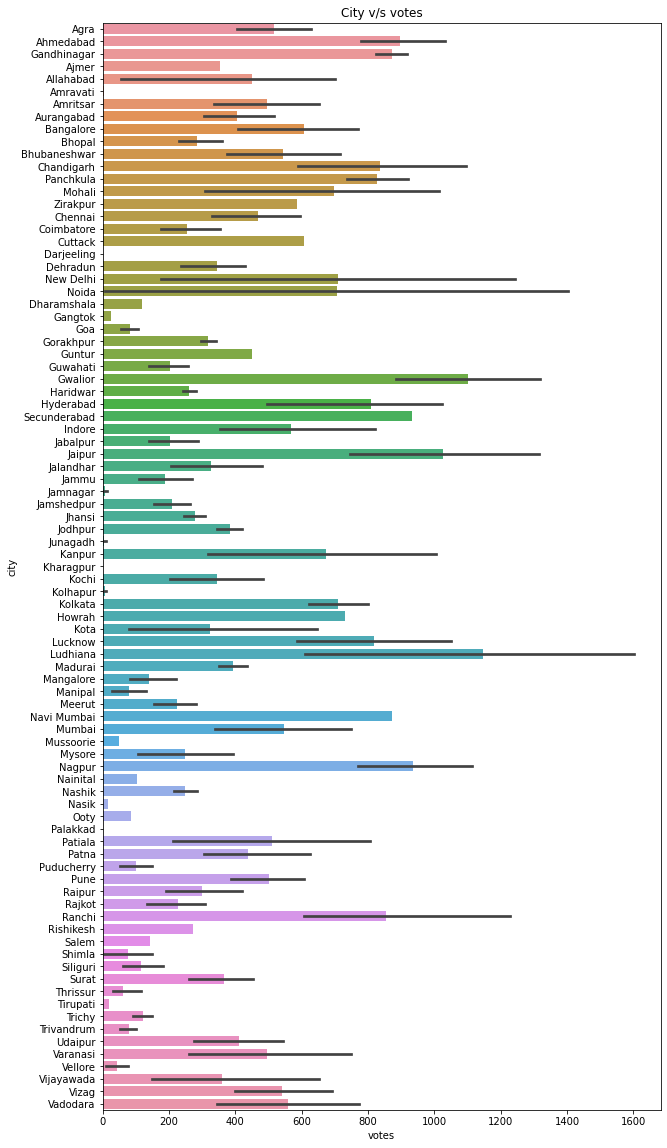

In [44]:
plt.figure(figsize=(10,20))
sns.barplot(x='votes',y="city",data=dom)
plt.title("City v/s votes")
plt.show()

Ludhiana's Dominos oultet has the maximum votes as compare to other outlets. 4 outlets have 0 votes which is located in Goa, Jamnagar, Junagadh and palakkad

In [42]:
print(data.loc[data['name']=="Domino's Pizza", 'photo_count'].value_counts())
print(data.loc[data['name']=="Domino's Pizza", 'photo_count'].mean())

plt.figure(figsize=(10,20))
sns.barplot(x="photo_count",y="city",data=dom)
plt.title("City VS photo count")
plt.show()

4      9
10     8
11     8
3      8
2      7
      ..
34     1
183    1
717    1
417    1
31     1
Name: photo_count, Length: 183, dtype: int64


In [46]:


print(data.loc[(data['name']=="Domino's Pizza") & (data['photo_count']==0),'city' ].value_counts())
print(data.loc[(data['name']=="Domino's Pizza") & (data['photo_count']==0),'city' ])
print(data.loc[(data['name']=="Domino's Pizza") & (data['photo_count']<1000),'city' ].max())
print(data.loc[(data['name']=="Domino's Pizza") & (data['city']=='Zirakpur'),'photo_count' ])
print(data.loc[(data['name']=="Domino's Pizza") & (data['city']=='Zirakpur') & (data['photo_count']== 155 ),'locality'])


Jamnagar      2
Junagadh      2
Darjeeling    1
Tirupati      1
Vellore       1
Name: city, dtype: int64
49888     Darjeeling
95058       Jamnagar
95162       Jamnagar
103393      Junagadh
103436      Junagadh
191541      Tirupati
204047       Vellore
Name: city, dtype: object
Zirakpur
30599    155
Name: photo_count, dtype: int64
30599    VIP Road
Name: locality, dtype: object


Zikarpur city's outlet located on VIP Road has tha maximum numbers of votes(587). 
6 outlets have zero votes. 85 is the average votes of dominos on zomato

In [ ]:
print(data.loc[data['name']=="Domino's Pizza", 'delivery'].value_counts())
print(data.loc[data['name']=="Domino's Pizza", 'opentable_support'].value_counts())
print(data.loc[data['name']=="Domino's Pizza", 'takeaway'].value_counts())



**CONCLUSION**
1. Domino's Pizza has the maximum chains across different cities in zomato. there are total 399 outlets of Dominos. 
2. Approx 91% of Domino's outlets has the Quick Bites establishment and the others establishment are casual dining, Food truck and one establishment is unknown. Only one outlet has food Truck located in noida, sector 127. 
3. 87 different cities have the Domino's pizza outlets. Kolkata has the maximum number of chains of Dominos i.e., 26. In 20 cities only single outlet of Dominos is present. 12 cities do not have Domino's outlets.
4. All Dominos pizza's Outlets has the Pizza and fast food cuisines. 
5. The average costs for two of Dominos are 700 and 400. Mostly chains of Dominos show 400 average cost for two 10 outlets shows 700 cost for two.
6. All the outlets of Jaipur shows 700 average cost for two and price range of two. 
7. Mostly outlets of Dominos has 2 price range. Ahmedabad and Kolkata have the maximum outlets with the price range of 2 and 1, respectively. 
8. Maximum outlets has 3.9 rating. The mean of rating of outlets id 3.4. he Domino's outlets has the maximum rating of 4.2 which had by 6 chains and only 1 chain which is located in pune has the minimum rating of 2.4. 
9. Mostly outlets have Good rating but 4 outlets are non rated and 1 outlet which is loacted in Pune has poor rating. 
10. Ludhiana's Dominos oultet has the maximum votes as compare to other outlets. 4 outlets have 0 votes. 
11. Zikarpur city's outlet located on VIP Road has the maximum numbers of photo count that and 6 outlets have zero votes.